# Task 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from manifolds import *

### Part 1

In [2]:
# read the manifold data
manifold = read_manifold_data(path="../data/takens_1.txt")

Plot the first coordinate against the line number in the dataset (the "time"):

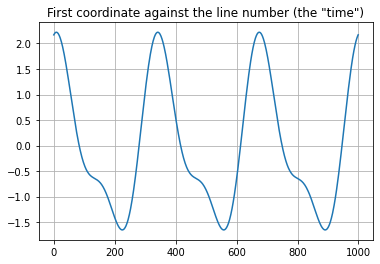

In [5]:
x = range(len(manifold[:, 0]))  # x-axis (time steps)
plt.plot(x, manifold[:, 0])
plt.title("First coordinate against the line number (the \"time\")")
plt.grid()
plt.show()

Choose a delay $\Delta_n$ of rows and plot the coordinate against its delayed version:

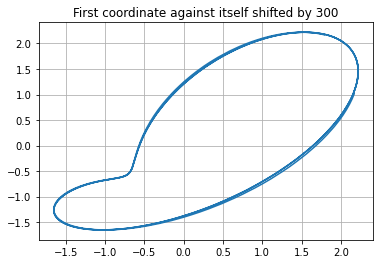

In [17]:
delta_t = 300
x = np.roll(manifold[:, 0], shift=delta_t)
plt.plot(x, manifold[:, 0])
plt.title(f"First coordinate against itself shifted by {delta_t}")
plt.grid()
plt.show()

According to Taken's theorem, how many coordinated do you need to plot
to be sure that the periodic manifold is embedded correctly?

Our manifold's dimension is $d=1$, so we need $2d+1=3$ coordinates.
